# DATASET과 DATALOADER

- `torch.utils.data` 모듈을 통해 `Datasets`과 `DataLoader`를 사용할 수 있음
    - `from torch.utils.data import Datasets`
    - `from torch.utils.data import DataLoader`
    > `Datasets`은 단순히 샘플과 label이 있는 데이터를 불러와주는 역할이라면,
    `DataLoader`는 불러온 샘플에 쉽게 접근할 수 있도록 반복가능한 개체로 만들어 주는 역할을 함(배치 형태로 만들어줌)
    >> `DataLoader`를 사용하지 않는다면 사용자는 샘플에 접근하기 위한 반복 구조를 별도로 만들어 주어야 한다.
    >> 뭔가 개념이 잘 이해가 안된다. [홈페이지](https://pytorch.org/vision/stable/datasets.html) 참고

- torchvision 라이브러리를 통해 Pytorch에서 제공되는 데이터셋을 불러올 수 있음
    - `from torchvision import datasets`
    - 사용가능한 데이터셋 목록은 [홈페이지](https://pytorch.org/vision/0.10/) 참고
- 공통적인 매개변수
    - `root`: 학습/테스트 데이터가 저장되는 경로
    - `train`: 학습용 또는 테스트용 데이터셋 여부 지정, **True**일 경우 학습용, **False**일 경우 테스트용
        > 평가(valid)는 따로 없는 것을 보니, 사용자가 직접 지정을 해주어야 하는 것 같음
    - `download=True`: `root`에 데이터가 없는 경우 인터넷에서 다운로드
    - `transform` / `target_transform`: 특징(feature)과 정답(label) 변형(transform)을 지정
        - 데이터 전처리 역할을 한다고 보면 됨
        - 이미지 re-size, 정규화, 텐서로 변환 등 수행
        - `compose`로 묶어서 사용
            - `torchvision.transforms.compose([...])`
            > `compose`는 리스트 안에 있는 명령들을 순서대로 실행시켜 준다.
        - [홈페이지](https://pytorch.org/vision/stable/transforms.html) 참고    

In [2]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tr = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [4]:
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=tr)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=tr)

Files already downloaded and verified
Files already downloaded and verified


In [114]:
labels_map = {
    0: "Airplane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck",
}
sample_idx = torch.randint(len(train_data), size=(1, )).item()
print(f'Image: {train_data[sample_idx][0].shape}')
print(f'Label: {train_data[sample_idx][1]}, {labels_map[train_data[sample_idx][1]]}')

Image: torch.Size([3, 32, 32])
Label: 6, Frog


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

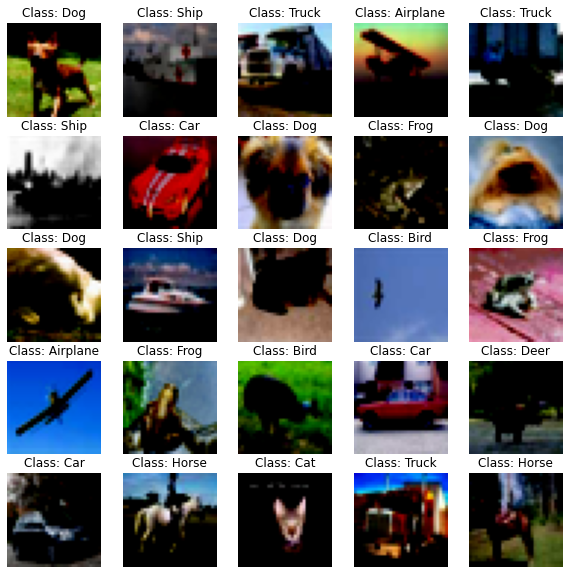

In [115]:

figure = plt.figure(figsize=(10, 10))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    image, label = train_data[sample_idx]
    image = np.array(image)
    image = np.transpose(image, (1, 2, 0))
    plt.subplot(cols, rows, i)
    plt.imshow(image)
    plt.title(f'Class: {labels_map[label]}')
    plt.axis("off")
plt.show()

In [116]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


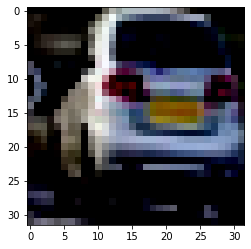

Label: 1


In [119]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
img = np.array(img)
img = np.transpose(img, (1, 2, 0))
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")